<a href="https://colab.research.google.com/github/Cofferri1/Desafio_Vendas/blob/main/Desafio_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [35]:
arquivo = '/content/relatorio_vendas.csv'
data = pd.read_csv(arquivo)
data.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

In [37]:
#Alterar type de data
data['data_pedido'] = pd.to_datetime(data['data_pedido'], format='%Y-%m-%d')
data['data_envio'] = pd.to_datetime(data['data_envio'], format='%Y-%m-%d')
data.head()


,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


## **Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?**

In [38]:
data['ano'] = data['data_pedido'].dt.year
LucroPorAno = data.groupby('ano')['lucro'].sum().reset_index()
LucroPorAno = LucroPorAno.sort_values(by='lucro', ascending=True)
LucroPorAno

,ano,lucro
0,2016,75033.63
1,2017,101265.15
2,2018,129862.44
3,2019,148097.30


<ipython-input-39-0cb90b26a041>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ano', y='lucro', data=base, ax=ax, palette=tonalidade)


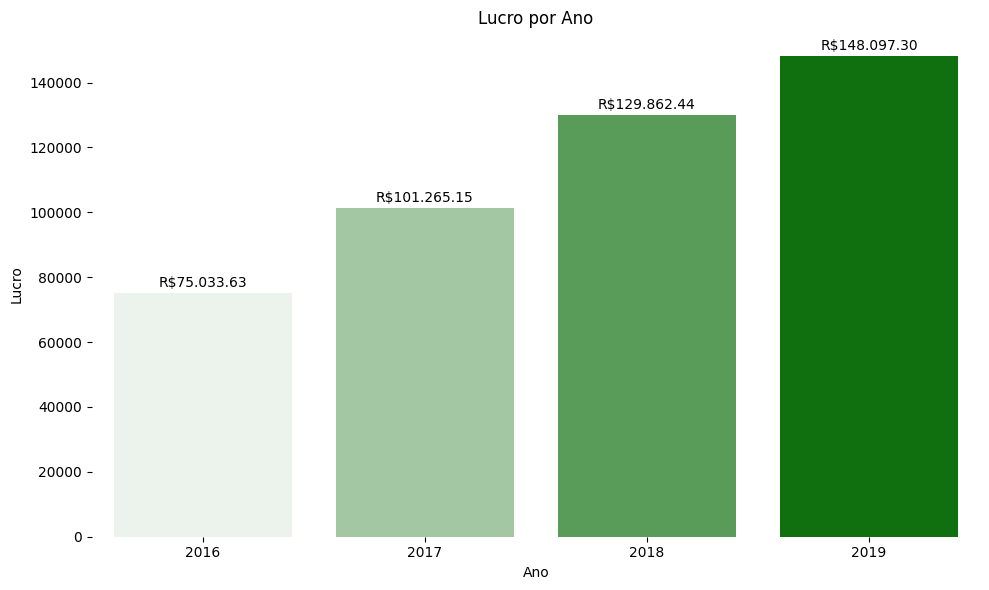

In [39]:
#Gerar grafico
def gerar_grafico_lucro_por_ano(base):
  fig, ax = plt.subplots(figsize=(10, 6))
  cor_base = "green"  # Cor base para as barras
  tonalidade = sns.light_palette(cor_base, n_colors=len(base['lucro']), reverse=False)

    # Criar o gráfico de barras
  sns.barplot(x='ano', y='lucro', data=base, ax=ax, palette=tonalidade)

  ax.set_title('Lucro por Ano')
  ax.set_xlabel('Ano')
  ax.set_ylabel('Lucro')
  sns.despine(left=True, bottom=True)

  #Escrever valores
  for i, valor in enumerate(LucroPorAno['lucro']):
    qtde = f'R${valor:,.2f}'.replace(',', '.')
    offset = 1e3
    ax.text(i, valor + offset, qtde, ha='center', va='bottom', fontsize=10)

  plt.tight_layout()
  plt.show()

gerar_grafico_lucro_por_ano(LucroPorAno)

## Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.


<ipython-input-60-efd6649e0154>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10.values, y=(top10.index), palette=cores, orient='h')


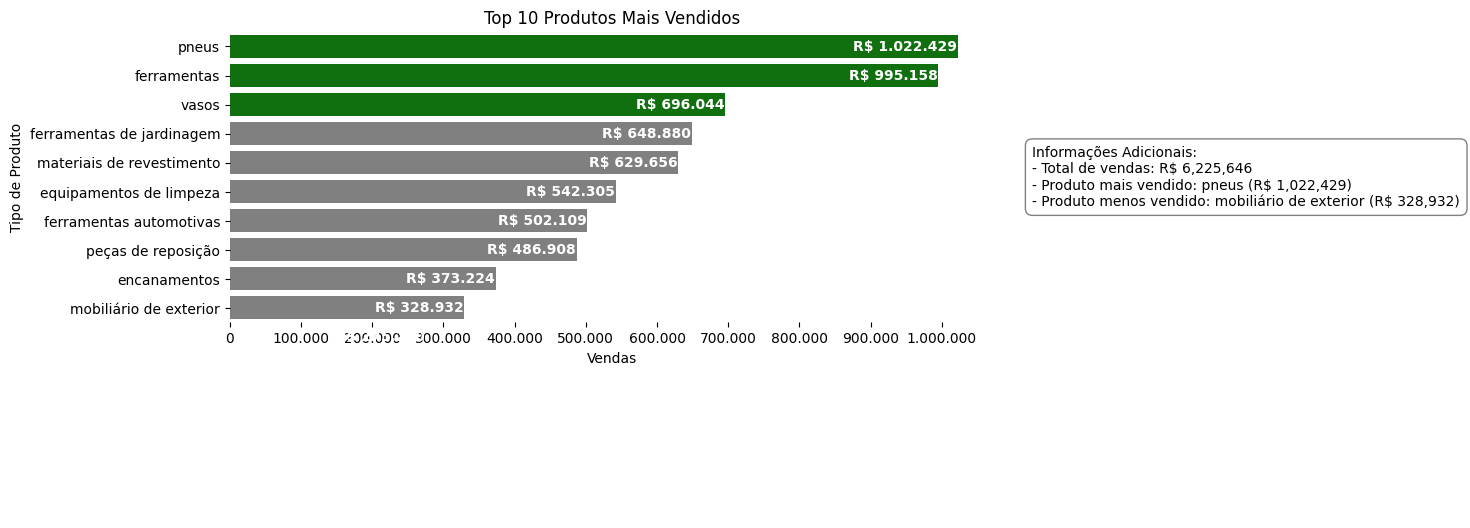

In [60]:
def top_vendas():
  topvendas = data.groupby('tipo_produto')['vendas'].sum().sort_values(ascending=False)
  top10 = topvendas[:10]

  #Grafico

  cores = ['green' if valor >= 696044 else 'grey' for valor in top10.values]

  fig, ax = plt.subplots(figsize=(15, 7))
  ax = sns.barplot(x=top10.values, y=(top10.index), palette=cores, orient='h')
  sns.despine(left=True, bottom=True)

  ax.set_xlabel('Vendas')
  ax.set_ylabel('Tipo de Produto')
  ax.set_title('Top 10 Produtos Mais Vendidos')
  ax.xaxis.set_major_locator(MultipleLocator(100000))  # Incrementos de 100.000
  ax.xaxis.set_major_formatter(lambda x, _: f'{int(x):,}'.replace(',', '.'))  # Formatar números como '100.000'

  #Escrever valores
  for i, valor in enumerate(topvendas.values):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= 'white', fontsize=10, fontweight='bold', ha='right', va='center')

  info_text = (
        "Informações Adicionais:\n"
        f"- Total de vendas: R$ {top10.sum():,.0f}\n"
        f"- Produto mais vendido: {top10.index[0]} (R$ {top10.values[0]:,.0f})\n"
        f"- Produto menos vendido: {top10.index[-1]} (R$ {top10.values[-1]:,.0f})"
    )
  ax.text(1.05, 0.5, info_text, transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'),
            ha='left', va='center')

    # Ajustar layout
  plt.tight_layout()
  plt.show()

top_vendas()